### Importing Libraries

In [36]:
import pandas as pd
import numpy as np
import datetime
import matplotlib as plt
import csv
import operator
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import seaborn as sns
import math
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing  







### Importing the dataset

In [37]:
df = pd.read_csv("C:/Users/ayush.chaturvedi/Downloads/train_r7VTVyN_Ko9cGPz.csv")


In [38]:
#Basic

In [39]:
df.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,...,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,...,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,...,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [40]:
df.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,...,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,...,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,...,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [41]:
#Columns of df
df.columns

Index(['ID', 'Office_PIN', 'Application_Receipt_Date', 'Applicant_City_PIN',
       'Applicant_Gender', 'Applicant_BirthDate', 'Applicant_Marital_Status',
       'Applicant_Occupation', 'Applicant_Qualification', 'Manager_DOJ',
       'Manager_Joining_Designation', 'Manager_Current_Designation',
       'Manager_Grade', 'Manager_Status', 'Manager_Gender', 'Manager_DoB',
       'Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business',
       'Manager_Num_Products', 'Manager_Business2', 'Manager_Num_Products2',
       'Business_Sourced'],
      dtype='object')

In [42]:
#Shape of object
df.shape

(9527, 23)

In [43]:
#missing value percentage
df.isnull().sum()/len(df)*100

ID                              0.000000
Office_PIN                      0.000000
Application_Receipt_Date        0.000000
Applicant_City_PIN              1.018159
Applicant_Gender                0.703264
Applicant_BirthDate             0.766243
Applicant_Marital_Status        0.766243
Applicant_Occupation           12.816207
Applicant_Qualification         0.902698
Manager_DOJ                     7.169098
Manager_Joining_Designation     7.169098
Manager_Current_Designation     7.169098
Manager_Grade                   7.169098
Manager_Status                  7.169098
Manager_Gender                  7.169098
Manager_DoB                     7.169098
Manager_Num_Application         7.169098
Manager_Num_Coded               7.169098
Manager_Business                7.169098
Manager_Num_Products            7.169098
Manager_Business2               7.169098
Manager_Num_Products2           7.169098
Business_Sourced                0.000000
dtype: float64

In [44]:
#Info of df()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           9527 non-null   object 
 1   Office_PIN                   9527 non-null   int64  
 2   Application_Receipt_Date     9527 non-null   object 
 3   Applicant_City_PIN           9430 non-null   float64
 4   Applicant_Gender             9460 non-null   object 
 5   Applicant_BirthDate          9454 non-null   object 
 6   Applicant_Marital_Status     9454 non-null   object 
 7   Applicant_Occupation         8306 non-null   object 
 8   Applicant_Qualification      9441 non-null   object 
 9   Manager_DOJ                  8844 non-null   object 
 10  Manager_Joining_Designation  8844 non-null   object 
 11  Manager_Current_Designation  8844 non-null   object 
 12  Manager_Grade                8844 non-null   float64
 13  Manager_Status    

### CHANGE DATA TYPES

In [45]:
#Converting dates into date time format

In [46]:
df['Application_Receipt_Date'] = pd.to_datetime(df['Application_Receipt_Date'])
df['Applicant_BirthDate'] = pd.to_datetime(df['Applicant_BirthDate'])
df['Manager_DoB'] = pd.to_datetime(df['Manager_DoB'])
df['Manager_DOJ'] = pd.to_datetime(df['Manager_DOJ'])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           9527 non-null   object        
 1   Office_PIN                   9527 non-null   int64         
 2   Application_Receipt_Date     9527 non-null   datetime64[ns]
 3   Applicant_City_PIN           9430 non-null   float64       
 4   Applicant_Gender             9460 non-null   object        
 5   Applicant_BirthDate          9454 non-null   datetime64[ns]
 6   Applicant_Marital_Status     9454 non-null   object        
 7   Applicant_Occupation         8306 non-null   object        
 8   Applicant_Qualification      9441 non-null   object        
 9   Manager_DOJ                  8844 non-null   datetime64[ns]
 10  Manager_Joining_Designation  8844 non-null   object        
 11  Manager_Current_Designation  8844 non-null 

### EDA

In [48]:
#Creating eda dataset
edadf=df

In [49]:
#convert to category
edadf['Office_PIN']=edadf['Office_PIN'].astype("category")
edadf['Applicant_City_PIN']=edadf['Applicant_City_PIN'].astype("category")
edadf['Manager_Grade']=edadf['Manager_Grade'].astype("category")
edadf['Business_Sourced']=edadf['Business_Sourced'].astype("category")
edadf['Manager_Num_Coded']=edadf['Manager_Num_Coded'].astype("category")
edadf['Applicant_Gender']=edadf['Applicant_Gender'].astype("category")
edadf['Applicant_Marital_Status']=edadf['Applicant_Marital_Status'].astype("category")
edadf['Applicant_Occupation']=edadf['Applicant_Occupation'].astype("category")
edadf['Applicant_Qualification']=edadf['Applicant_Qualification'].astype("category")
edadf['Manager_Joining_Designation']=edadf['Manager_Joining_Designation'].astype("category")
edadf['Manager_Current_Designation']=edadf['Manager_Current_Designation'].astype("category")
edadf['Manager_Status']=edadf['Manager_Status'].astype("category")
edadf['Manager_Gender']=edadf['Manager_Gender'].astype("category")




In [50]:
# #DATE Columns
# edadf['Applicant_BirthDate']=pd.to_numeric(edadf['Applicant_BirthDate'])
# edadf['Application_Receipt_Date']=pd.to_numeric(edadf['Application_Receipt_Date'])
# edadf['Manager_DOJ']=pd.to_numeric(edadf['Manager_DOJ'])
# edadf['Manager_DoB']=pd.to_numeric(edadf['Manager_DoB'])

### Univariate Analysis

<AxesSubplot:xlabel='Applicant_Gender', ylabel='count'>

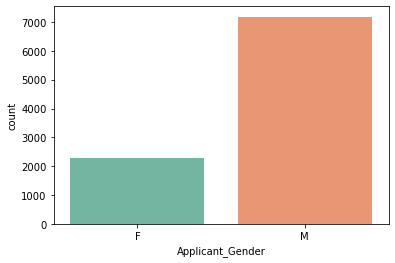

In [51]:
sns.countplot(x=edadf['Applicant_Gender'],palette="Set2")

<AxesSubplot:xlabel='Applicant_Marital_Status', ylabel='count'>

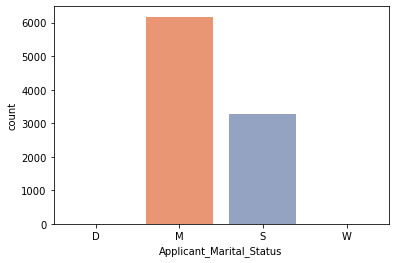

In [52]:
sns.countplot(x=edadf['Applicant_Marital_Status'],palette="Set2")

<AxesSubplot:xlabel='Applicant_Occupation', ylabel='count'>

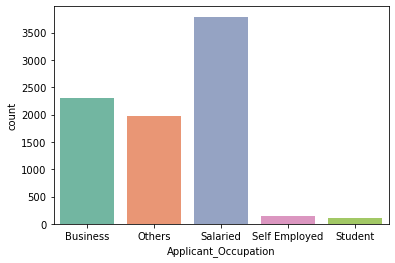

In [53]:
sns.countplot(x=edadf['Applicant_Occupation'],palette="Set2")

<AxesSubplot:xlabel='Manager_Current_Designation', ylabel='count'>

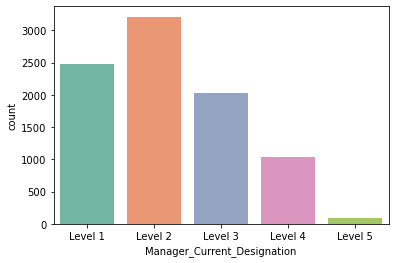

In [54]:
sns.countplot(x=edadf['Manager_Current_Designation'],palette="Set2")

<AxesSubplot:xlabel='Manager_Status', ylabel='count'>

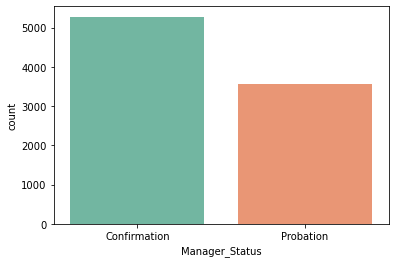

In [55]:
sns.countplot(x=edadf['Manager_Status'],palette="Set2")

<AxesSubplot:xlabel='Manager_Joining_Designation', ylabel='count'>

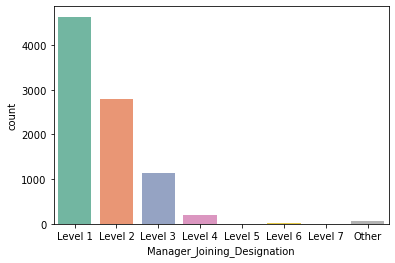

In [56]:
sns.countplot(x=edadf['Manager_Joining_Designation'],palette="Set2")

<AxesSubplot:xlabel='count', ylabel='Applicant_Qualification'>

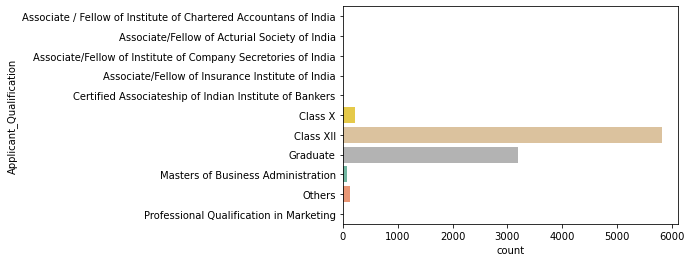

In [57]:
sns.countplot(y=edadf['Applicant_Qualification'],palette="Set2")

<AxesSubplot:xlabel='Manager_Grade', ylabel='count'>

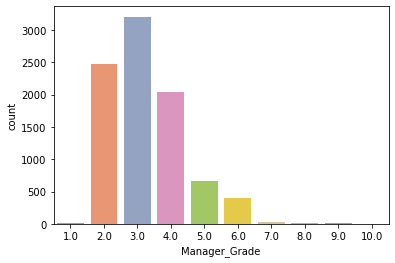

In [58]:
sns.countplot(x=edadf['Manager_Grade'],palette="Set2")

<AxesSubplot:xlabel='Manager_Gender', ylabel='count'>

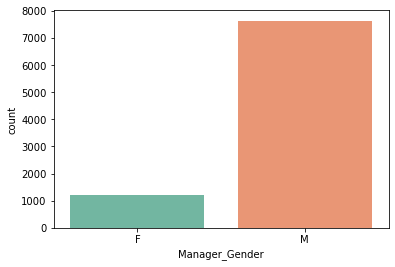

In [59]:
sns.countplot(x=edadf['Manager_Gender'],palette="Set2")

<AxesSubplot:xlabel='Manager_Num_Application', ylabel='count'>

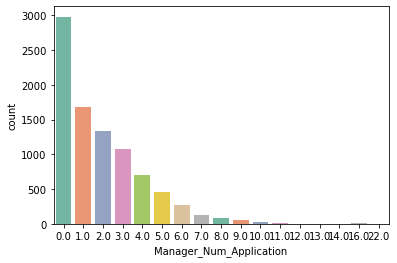

In [60]:
sns.countplot(x=edadf['Manager_Num_Application'],palette="Set2")

In [61]:
# sns.countplot(x=edadf['Applicant_City_PIN'],palette="Set2")

<AxesSubplot:xlabel='Business_Sourced', ylabel='count'>

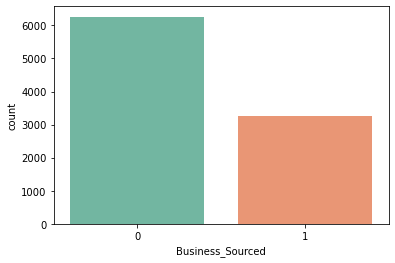

In [62]:
sns.countplot(x=edadf['Business_Sourced'],palette="Set2")

In [63]:


def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(x=points, y=[0,0], color = 'black', label = "std_dev")

    sns.scatterplot(x=[mini,maxi], y=[0,0], color = 'orange', label = "min/max")
    sns.scatterplot(x=[mean], y=[0], color = 'red', label = "mean")
    sns.scatterplot(x=[median], y=[0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))


In [65]:
# plt.figure(figsize=[30,6])
# sns.countplot(x = 'Office_PIN', data=edadf,palette="Set2")
# plt.xticks(rotation=90)
# plt.show()

In [66]:
# plt.figure(figsize=[30,6])
# sns.countplot(x = 'Applicant_City_PIN', data=edadf,palette="Set2")

# plt.show()

### IMPUTE DATA AND CREATE NEW FEATURES 

In [67]:
#Replacing Data cols values which are not present in test or less in count, convert to 'Others'
df['Applicant_Qualification'].replace('Masters of Business Administration','Other',inplace = True)
df['Applicant_Qualification'].replace('Associate/Fellow of Institute of Company Secretories of India','Other',inplace = True)
df['Applicant_Qualification'].replace('Associate / Fellow of Institute of Chartered Accountans of India','Other',inplace = True)
df['Applicant_Qualification'].replace('Associate/Fellow of Insurance Institute of India','Others',inplace = True)
df['Applicant_Qualification'].replace('Associate/Fellow of Acturial Society of India','Other',inplace = True)
df['Applicant_Qualification'].replace('Certified Associateship of Indian Institute of Bankers','Other',inplace = True)
df['Applicant_Qualification'].replace('Professional Qualification in Marketing','Other',inplace = True)
df['Manager_Joining_Designation'].replace(['Level 4','Level 5','Level 6','Level 7'],'Other', inplace=True)
df['Manager_Current_Designation'].replace(['Level 4','Level 5'],'Other', inplace=True)
df['Manager_Grade'].replace(['5','6','7','8','9','10'],'Other', inplace=True)

In [68]:
from datetime import datetime



In [69]:
#calculate current date 
date_today=(pd.to_datetime(datetime.today().strftime('%Y-%m-%d')))


In [70]:
df.dtypes

ID                                     object
Office_PIN                           category
Application_Receipt_Date       datetime64[ns]
Applicant_City_PIN                   category
Applicant_Gender                     category
Applicant_BirthDate            datetime64[ns]
Applicant_Marital_Status             category
Applicant_Occupation                 category
Applicant_Qualification              category
Manager_DOJ                    datetime64[ns]
Manager_Joining_Designation          category
Manager_Current_Designation          category
Manager_Grade                        category
Manager_Status                       category
Manager_Gender                       category
Manager_DoB                    datetime64[ns]
Manager_Num_Application               float64
Manager_Num_Coded                    category
Manager_Business                      float64
Manager_Num_Products                  float64
Manager_Business2                     float64
Manager_Num_Products2             

In [71]:
# df['Cal_Application_Receipt_Date']=date_today-df['Application_Receipt_Date']

In [72]:
df.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,2007-04-16,844120.0,M,1971-12-19,M,Others,Graduate,2005-11-10,...,Confirmation,M,1978-02-17,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,2007-04-16,844111.0,M,1983-02-17,S,Others,Class XII,2005-11-10,...,Confirmation,M,1978-02-17,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,2007-04-16,844101.0,M,1966-01-16,M,Business,Class XII,2006-05-27,...,Confirmation,M,1969-03-03,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,2007-04-16,814112.0,M,1988-02-03,S,Salaried,Class XII,2003-08-21,...,Confirmation,F,1978-08-14,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,2007-04-16,815351.0,M,1985-07-04,M,Others,Class XII,2006-05-08,...,Confirmation,M,1971-02-07,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [73]:
#Feature: Applicant Gender

In [74]:
#APPLICANT GENDER
df['Applicant_Gender'].value_counts(normalize=True)

M    0.758879
F    0.241121
Name: Applicant_Gender, dtype: float64

In [75]:
df['Applicant_Gender'].isnull().sum()

67

In [76]:
#Replace Missing values with mode
df['Applicant_Gender']=df['Applicant_Gender'].fillna(df['Applicant_Gender'].mode()[0])



In [77]:
#Feature: Marital Status

In [78]:
#Impute Marrital Status with mode
df['Applicant_Marital_Status'].value_counts(normalize=True)

M    0.653374
S    0.345568
W    0.000635
D    0.000423
Name: Applicant_Marital_Status, dtype: float64

In [79]:
df['Applicant_Marital_Status'].isnull().sum()/df.shape[0]

0.007662433084916553

In [80]:
df['Applicant_Marital_Status']=df['Applicant_Marital_Status'].fillna(df['Applicant_Marital_Status'].mode()[0])



In [81]:
#Feature: Manager Status

In [82]:
#Impute Manager Status with Mode

In [83]:
df['Manager_Status'].value_counts(normalize=True)

Confirmation    0.596676
Probation       0.403324
Name: Manager_Status, dtype: float64

In [84]:
df.dtypes

ID                                     object
Office_PIN                           category
Application_Receipt_Date       datetime64[ns]
Applicant_City_PIN                   category
Applicant_Gender                     category
Applicant_BirthDate            datetime64[ns]
Applicant_Marital_Status             category
Applicant_Occupation                 category
Applicant_Qualification              category
Manager_DOJ                    datetime64[ns]
Manager_Joining_Designation          category
Manager_Current_Designation          category
Manager_Grade                        category
Manager_Status                       category
Manager_Gender                       category
Manager_DoB                    datetime64[ns]
Manager_Num_Application               float64
Manager_Num_Coded                    category
Manager_Business                      float64
Manager_Num_Products                  float64
Manager_Business2                     float64
Manager_Num_Products2             

In [85]:
df['Manager_Status'].value_counts()

Confirmation    5277
Probation       3567
Name: Manager_Status, dtype: int64

In [86]:
df['Manager_Status']=df['Manager_Status'].cat.add_categories('missing')

In [87]:
df['Manager_Status']=df['Manager_Status'].fillna('missing')



In [88]:
#Feature: Applicant_Occupation

In [89]:
#Impute Applicant_Occupation

In [90]:
df['Applicant_Occupation'].value_counts(normalize=True)

Salaried         0.455935
Business         0.277269
Others           0.236696
Self Employed    0.017939
Student          0.012160
Name: Applicant_Occupation, dtype: float64

In [91]:
df['Applicant_Occupation']=df['Applicant_Occupation'].cat.add_categories('Not Present')
df['Applicant_Occupation'].fillna('Not Present',inplace=True)


In [92]:
#Feature: Manager Grade

In [93]:
#Impute manager grade with '0'

In [94]:
df['Manager_Grade'].value_counts(normalize=True)

3.0     0.362619
2.0     0.279398
4.0     0.230439
5.0     0.075305
6.0     0.045907
7.0     0.002488
8.0     0.001583
1.0     0.000905
9.0     0.000791
10.0    0.000565
Name: Manager_Grade, dtype: float64

In [95]:
df['Manager_Grade'].head()



C:\Anaconda\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Anaconda\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


0    3.0
1    3.0
2    2.0
3    4.0
4    2.0
Name: Manager_Grade, dtype: category
Categories (10, float64): [1.0, 2.0, 3.0, 4.0, ..., 7.0, 8.0, 9.0, 10.0]

In [96]:
df['Manager_Grade']=df['Manager_Grade'].cat.add_categories('0')
df['Manager_Grade']=df['Manager_Grade'].fillna('0')



In [97]:
#Feature: Applicant_City_PIN

In [98]:
#CITY PIN 
df['Applicant_City_PIN'].isna().sum()

97

In [99]:
df.dtypes

ID                                     object
Office_PIN                           category
Application_Receipt_Date       datetime64[ns]
Applicant_City_PIN                   category
Applicant_Gender                     category
Applicant_BirthDate            datetime64[ns]
Applicant_Marital_Status             category
Applicant_Occupation                 category
Applicant_Qualification              category
Manager_DOJ                    datetime64[ns]
Manager_Joining_Designation          category
Manager_Current_Designation          category
Manager_Grade                        category
Manager_Status                       category
Manager_Gender                       category
Manager_DoB                    datetime64[ns]
Manager_Num_Application               float64
Manager_Num_Coded                    category
Manager_Business                      float64
Manager_Num_Products                  float64
Manager_Business2                     float64
Manager_Num_Products2             

In [100]:
df[df['Applicant_City_PIN'].isnull()].head(10)

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
278,FIN1000279,110005,2007-04-21,NaN,M,NaT,M,Not Present,NaN,2005-11-11,...,Confirmation,M,1966-07-06,1.0,0.0,281388.0,13.0,281388.0,13.0,0
595,FIN1000596,636004,2007-05-01,NaN,M,NaT,M,Not Present,NaN,NaT,...,missing,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0
847,FIN1000848,700016,2007-05-07,NaN,M,NaT,M,Not Present,NaN,NaT,...,missing,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0
1025,FIN1001026,274001,2007-05-09,NaN,M,NaT,M,Not Present,NaN,2003-06-02,...,Confirmation,M,1978-05-07,1.0,0.0,251492.0,8.0,251492.0,8.0,0
1169,FIN1001170,700016,2007-05-10,NaN,M,NaT,M,Not Present,NaN,NaT,...,missing,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0
1178,FIN1001179,713216,2007-05-10,NaN,M,NaT,M,Not Present,NaN,2002-08-30,...,Confirmation,M,1960-07-30,2.0,0.0,285144.0,15.0,285144.0,15.0,0
2056,FIN1002057,802101,2007-06-26,NaN,M,NaT,M,Not Present,NaN,2003-10-16,...,Confirmation,M,1974-01-08,4.0,1.0,388979.0,29.0,388979.0,29.0,0
2134,FIN1002135,281001,2007-07-02,NaN,M,1983-06-17,M,Business,Graduate,NaT,...,missing,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0
2171,FIN1002172,841226,2007-07-04,NaN,M,NaT,M,Not Present,NaN,2004-05-01,...,Confirmation,M,1969-07-07,4.0,0.0,76162.0,4.0,76162.0,4.0,0
2898,FIN1002899,851101,2007-08-06,NaN,M,1984-12-08,M,Business,Class XII,2007-06-11,...,Probation,M,1971-02-07,9.0,1.0,15709.0,1.0,15709.0,1.0,1


In [101]:
df['Applicant_City_PIN'].describe()

count       9430.0
unique      2979.0
top       202001.0
freq         103.0
Name: Applicant_City_PIN, dtype: float64

In [102]:
# # If applicant City pin is missing thn we are putting applicants office pin.


# df.loc[df['Applicant_City_PIN'].isnull(),'Applicant_City_PIN'] = df.loc[df['Applicant_City_PIN'].isnull(),'Office_PIN']

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           9527 non-null   object        
 1   Office_PIN                   9527 non-null   category      
 2   Application_Receipt_Date     9527 non-null   datetime64[ns]
 3   Applicant_City_PIN           9430 non-null   category      
 4   Applicant_Gender             9527 non-null   category      
 5   Applicant_BirthDate          9454 non-null   datetime64[ns]
 6   Applicant_Marital_Status     9527 non-null   category      
 7   Applicant_Occupation         9527 non-null   category      
 8   Applicant_Qualification      9441 non-null   category      
 9   Manager_DOJ                  8844 non-null   datetime64[ns]
 10  Manager_Joining_Designation  8844 non-null   category      
 11  Manager_Current_Designation  8844 non-null 

In [104]:
df.isnull().sum()

ID                               0
Office_PIN                       0
Application_Receipt_Date         0
Applicant_City_PIN              97
Applicant_Gender                 0
Applicant_BirthDate             73
Applicant_Marital_Status         0
Applicant_Occupation             0
Applicant_Qualification         86
Manager_DOJ                    683
Manager_Joining_Designation    683
Manager_Current_Designation    683
Manager_Grade                    0
Manager_Status                   0
Manager_Gender                 683
Manager_DoB                    683
Manager_Num_Application        683
Manager_Num_Coded              683
Manager_Business               683
Manager_Num_Products           683
Manager_Business2              683
Manager_Num_Products2          683
Business_Sourced                 0
dtype: int64

In [105]:
#Feature: Manager Joining Designation

In [106]:
#Impute Manager Joining Designation values with 'Level 0'

In [107]:
df['Manager_Joining_Designation'].value_counts()

Level 1    4632
Level 2    2787
Level 3    1146
Other       279
Name: Manager_Joining_Designation, dtype: int64

In [108]:
df['Manager_Joining_Designation']=df['Manager_Joining_Designation'].cat.add_categories('Level 0')
df['Manager_Joining_Designation']=df['Manager_Joining_Designation'].fillna('Level 0')



In [109]:
df['Manager_Joining_Designation'].value_counts(normalize=True)

Level 1    0.486197
Level 2    0.292537
Level 3    0.120290
Level 0    0.071691
Other      0.029285
Name: Manager_Joining_Designation, dtype: float64

In [110]:
#Feature Manager_Current_Designation'

In [111]:
#Impute Manager_Current_Designation' values with 'Level 0'

In [112]:
df['Manager_Current_Designation'].value_counts(normalize=True)

Level 2    0.362732
Level 1    0.280303
Level 3    0.229873
Other      0.127092
Name: Manager_Current_Designation, dtype: float64

In [113]:
df['Manager_Current_Designation']=df['Manager_Current_Designation'].cat.add_categories('Level 0')
df['Manager_Current_Designation']=df['Manager_Current_Designation'].fillna('Level 0')

In [114]:
#feature: Manager_Num_Application

In [115]:
#Impute Manager Num Application with 0

In [116]:
df['Manager_Num_Application'].value_counts(normalize=True)

0.0     0.336952
1.0     0.189620
2.0     0.151402
3.0     0.121325
4.0     0.080280
5.0     0.051787
6.0     0.030529
7.0     0.014925
8.0     0.009498
9.0     0.007123
10.0    0.003053
11.0    0.001583
16.0    0.000678
12.0    0.000565
13.0    0.000452
14.0    0.000113
22.0    0.000113
Name: Manager_Num_Application, dtype: float64

In [117]:
df['Manager_Num_Application']=df['Manager_Num_Application'].fillna(0)


In [118]:
#feature: Manager_Num_Coded

In [119]:
#MANAGER Num Coded impute with 0

In [120]:
df['Manager_Num_Coded'].value_counts(normalize=True)

0.0    0.597354
1.0    0.203415
2.0    0.105834
3.0    0.053256
4.0    0.025441
5.0    0.009385
6.0    0.003392
7.0    0.000791
8.0    0.000678
9.0    0.000452
Name: Manager_Num_Coded, dtype: float64

In [121]:
df['Manager_Num_Coded']=df['Manager_Num_Coded'].fillna(0)



In [122]:
#feature: Manager_Gender

In [123]:
#Impute Manager Gender with mode

In [124]:
df['Manager_Gender'].value_counts(normalize=True)

M    0.862393
F    0.137607
Name: Manager_Gender, dtype: float64

In [125]:
df['Manager_Gender']=df['Manager_Gender'].fillna(df['Manager_Gender'].mode()[0])



In [126]:
df.columns

Index(['ID', 'Office_PIN', 'Application_Receipt_Date', 'Applicant_City_PIN',
       'Applicant_Gender', 'Applicant_BirthDate', 'Applicant_Marital_Status',
       'Applicant_Occupation', 'Applicant_Qualification', 'Manager_DOJ',
       'Manager_Joining_Designation', 'Manager_Current_Designation',
       'Manager_Grade', 'Manager_Status', 'Manager_Gender', 'Manager_DoB',
       'Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business',
       'Manager_Num_Products', 'Manager_Business2', 'Manager_Num_Products2',
       'Business_Sourced'],
      dtype='object')

In [127]:
df['Manager_Current_Designation'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Level 2
1       Level 2
2       Level 1
3       Level 3
4       Level 1
         ...   
9522    Level 2
9523    Level 0
9524    Level 2
9525    Level 3
9526    Level 0
Name: Manager_Current_Designation, Length: 9527, dtype: category
Categories (5, object): ['Level 1', 'Level 2', 'Level 3', 'Other', 'Level 0']>

In [128]:
#feature: Manager_Num_Products and Manager_Num_Products2

In [129]:
#MANAGER NUM PRODUCTS impute with 0

In [130]:
df['Manager_Num_Products'].value_counts(normalize=True)

0.0      0.328924
6.0      0.048847
5.0      0.048168
4.0      0.045002
7.0      0.043419
8.0      0.040592
9.0      0.037427
3.0      0.035391
11.0     0.035052
1.0      0.033017
2.0      0.032564
10.0     0.031999
12.0     0.028833
13.0     0.025893
14.0     0.024197
15.0     0.021710
17.0     0.018996
18.0     0.015491
16.0     0.015152
19.0     0.011872
20.0     0.009272
21.0     0.008480
23.0     0.008254
22.0     0.005880
24.0     0.005767
25.0     0.005201
27.0     0.003505
26.0     0.003505
29.0     0.003166
28.0     0.002940
30.0     0.002488
32.0     0.002488
33.0     0.001809
35.0     0.001696
31.0     0.001357
34.0     0.001244
37.0     0.001131
41.0     0.001018
36.0     0.000905
38.0     0.000791
42.0     0.000791
39.0     0.000791
51.0     0.000565
60.0     0.000565
40.0     0.000565
66.0     0.000452
47.0     0.000452
43.0     0.000452
44.0     0.000339
46.0     0.000339
101.0    0.000226
53.0     0.000226
45.0     0.000226
74.0     0.000226
59.0     0.000113
61.0     0

In [131]:
df['Manager_Num_Products']=df['Manager_Num_Products'].fillna(0)

df['Manager_Num_Products2']=df['Manager_Num_Products2'].fillna(0)

In [132]:
###### #CREATING FEATURES
# 1) AGE OF MANAGER-- Age_Applicant
# 2) AGE OF APPLICANT
# 3) TENURE OF MANAGER
# 4) PROMOTION STATUS

In [133]:
df['Applicant_BirthDate']

0      1971-12-19
1      1983-02-17
2      1966-01-16
3      1988-02-03
4      1985-07-04
          ...    
9522   1970-01-18
9523   1956-09-11
9524   1975-08-07
9525   1986-12-23
9526   1976-02-07
Name: Applicant_BirthDate, Length: 9527, dtype: datetime64[ns]

In [134]:
#Feature : Age_Applicant & Age_Manager

In [135]:
# Calculating the age of the applicant and manager as on Applicant_BirthDate and DOB respectivity


from datetime import datetime, date


df['Age_Applicant'] = (date_today - df['Applicant_BirthDate']).astype('<m8[Y]')
df['Age_Manager'] = (date_today - df['Manager_DoB']).astype('<m8[Y]')



In [136]:
#Feature : Manager_Experience

In [137]:
#Calculate manager experience with today date and manager DOJ
df['Manager_Experience'] = (date_today - df['Manager_DOJ']).astype('<m8[Y]')

In [138]:
#Age_Applicant to bins


In [139]:
df['Age_Applicant'] = pd.cut(df['Age_Applicant'],[10,30,50,70,90,100],
       labels=['less than 30','30-50','50-70','70-90','greater than 90'])


df['Age_Manager'] = pd.cut(df['Age_Manager'],[10,30,50,70,90,100],
       labels=['less than 30','30-50','50-70','70-90','greater than 90'])



In [140]:
df.columns

Index(['ID', 'Office_PIN', 'Application_Receipt_Date', 'Applicant_City_PIN',
       'Applicant_Gender', 'Applicant_BirthDate', 'Applicant_Marital_Status',
       'Applicant_Occupation', 'Applicant_Qualification', 'Manager_DOJ',
       'Manager_Joining_Designation', 'Manager_Current_Designation',
       'Manager_Grade', 'Manager_Status', 'Manager_Gender', 'Manager_DoB',
       'Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business',
       'Manager_Num_Products', 'Manager_Business2', 'Manager_Num_Products2',
       'Business_Sourced', 'Age_Applicant', 'Age_Manager',
       'Manager_Experience'],
      dtype='object')

In [141]:
#Calculate Per Day Application by using Group_by for ID feature

ApplicationGroupBy =  df.groupby('Application_Receipt_Date')
df['Per Day Application'] = (ApplicationGroupBy['ID'].cumcount()+1)





In [142]:
df['Manager_Current_Designation'].value_counts()

Level 2    3208
Level 1    2479
Level 3    2033
Other      1124
Level 0     683
Name: Manager_Current_Designation, dtype: int64

In [143]:
df['Manager_Current_Designation'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
9522    False
9523    False
9524    False
9525    False
9526    False
Name: Manager_Current_Designation, Length: 9527, dtype: bool

In [144]:
#SPLIT levels for manager Current Designation and joining designation of manager

In [145]:
df['Manager_Current_Designation'] = df['Manager_Current_Designation'].apply(lambda x: 0 if x=='Other' else -1 if x=='Level 0' else int(x.split(' ')[-1]))


df['Manager_Joining_Designation'] = df['Manager_Joining_Designation'].apply(lambda x: 0 if x=='Other' else -1 if x=='Level 0' else int(x.split(' ')[-1]))



In [146]:
df['Manager_Joining_Designation'].value_counts()

1     4632
2     2787
3     1146
-1     683
0      279
Name: Manager_Joining_Designation, dtype: int64

In [147]:
#Convert remaining datatypes

In [148]:
df['Manager_Joining_Designation'] = df['Manager_Joining_Designation'].astype(int)

In [149]:
df['Manager_Joining_Designation'] = df['Manager_Joining_Designation'].astype(int)
df['Manager_Current_Designation'] = df['Manager_Current_Designation'].astype(int)

In [150]:
#Calculte if manager is promoted, demoted or at same level as of manager's joining date

In [151]:
df['Is_Promotion'] = (df['Manager_Current_Designation'] - df['Manager_Joining_Designation']).apply(lambda x : 'promoted' if x>0 else 'demoted' if x<0 else 'same' )
df.loc[df['Manager_Current_Designation'] ==-1,'Is_Promotion'] = 'Not Present'



In [152]:
#Add All manager num products and map in one column and drop other..

In [153]:
df['Manager_Num_Products']=df['Manager_Num_Products']+df['Manager_Num_Products2']


In [154]:
df.drop('Manager_Num_Products2',axis=1,inplace=True)

In [155]:
df.isnull().sum()

ID                               0
Office_PIN                       0
Application_Receipt_Date         0
Applicant_City_PIN              97
Applicant_Gender                 0
Applicant_BirthDate             73
Applicant_Marital_Status         0
Applicant_Occupation             0
Applicant_Qualification         86
Manager_DOJ                    683
Manager_Joining_Designation      0
Manager_Current_Designation      0
Manager_Grade                    0
Manager_Status                   0
Manager_Gender                   0
Manager_DoB                    683
Manager_Num_Application          0
Manager_Num_Coded                0
Manager_Business               683
Manager_Num_Products             0
Manager_Business2              683
Business_Sourced                 0
Age_Applicant                   73
Age_Manager                    683
Manager_Experience             683
Per Day Application              0
Is_Promotion                     0
dtype: int64

In [156]:
#Feature Age_Applicant 

In [157]:
#Age_Applicant which calculates thee age of applicant and after calculation replace fillna value with mode

In [158]:
df['Age_Applicant'].value_counts(normalize=True)

30-50              0.731436
50-70              0.227734
70-90              0.040618
less than 30       0.000106
greater than 90    0.000106
Name: Age_Applicant, dtype: float64

In [159]:
df['Age_Applicant'].fillna(df['Age_Applicant'].mode()[0], inplace =True)


In [160]:
#Feature Age_Manager

In [161]:
#Age_Manager which calculates thee age of applicant and after calculation replace fillna value with mode

In [162]:
df['Age_Manager'].fillna(df['Age_Manager'].mode()[0], inplace =True)

In [163]:
#Add All Manager_Business and map in one column and drop other..Replace missing values with mode

In [164]:

df['Manager_Business']=df['Manager_Business'].fillna(0)

df['Manager_Business2']=df['Manager_Business2'].fillna(0)

df['Manager_Business']=df['Manager_Business']+df['Manager_Business2']

df.drop('Manager_Business2',axis=1,inplace=True)



In [165]:
df['Manager_Experience']=df['Manager_Experience'].fillna(df['Manager_Experience'].mode()[0])




In [166]:
df.columns

Index(['ID', 'Office_PIN', 'Application_Receipt_Date', 'Applicant_City_PIN',
       'Applicant_Gender', 'Applicant_BirthDate', 'Applicant_Marital_Status',
       'Applicant_Occupation', 'Applicant_Qualification', 'Manager_DOJ',
       'Manager_Joining_Designation', 'Manager_Current_Designation',
       'Manager_Grade', 'Manager_Status', 'Manager_Gender', 'Manager_DoB',
       'Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business',
       'Manager_Num_Products', 'Business_Sourced', 'Age_Applicant',
       'Age_Manager', 'Manager_Experience', 'Per Day Application',
       'Is_Promotion'],
      dtype='object')

In [167]:
#Drop the columns

df.drop(['ID','Applicant_City_PIN','Office_PIN'],axis=1,inplace=True)


In [168]:
df.Applicant_Occupation.value_counts()

Salaried         3787
Business         2303
Others           1966
Not Present      1221
Self Employed     149
Student           101
Name: Applicant_Occupation, dtype: int64

In [169]:
#replace missingg values with Applicant_Qualification
df.Applicant_Qualification.fillna(df.Applicant_Qualification.mode()[0],inplace=True)

In [170]:
#Extract category columns and perform one hot-encoding 
cat_cols =df.columns[(df.dtypes =='object') | (df.dtypes=='category')]
cat_cols = cat_cols[cat_cols!='Business_Sourced']
dummies = pd.get_dummies(df[cat_cols])

In [171]:
df.isna().sum()

Application_Receipt_Date         0
Applicant_Gender                 0
Applicant_BirthDate             73
Applicant_Marital_Status         0
Applicant_Occupation             0
Applicant_Qualification          0
Manager_DOJ                    683
Manager_Joining_Designation      0
Manager_Current_Designation      0
Manager_Grade                    0
Manager_Status                   0
Manager_Gender                   0
Manager_DoB                    683
Manager_Num_Application          0
Manager_Num_Coded                0
Manager_Business                 0
Manager_Num_Products             0
Business_Sourced                 0
Age_Applicant                    0
Age_Manager                      0
Manager_Experience               0
Per Day Application              0
Is_Promotion                     0
dtype: int64

In [172]:
#Concat all caulmns
pd.concat([df,dummies],axis=1).isna().sum()

Application_Receipt_Date        0
Applicant_Gender                0
Applicant_BirthDate            73
Applicant_Marital_Status        0
Applicant_Occupation            0
                               ..
Age_Manager_greater than 90     0
Is_Promotion_Not Present        0
Is_Promotion_demoted            0
Is_Promotion_promoted           0
Is_Promotion_same               0
Length: 80, dtype: int64

In [173]:
#Concat all caulmns
df = pd.concat([df,dummies],axis=1)
df = df.drop(cat_cols,axis=1)
df.head()

,Application_Receipt_Date,Applicant_BirthDate,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_DoB,Manager_Num_Application,Manager_Business,Manager_Num_Products,Business_Sourced,...,Age_Applicant_greater than 90,Age_Manager_less than 30,Age_Manager_30-50,Age_Manager_50-70,Age_Manager_70-90,Age_Manager_greater than 90,Is_Promotion_Not Present,Is_Promotion_demoted,Is_Promotion_promoted,Is_Promotion_same
0,2007-04-16,1971-12-19,2005-11-10,1,2,1978-02-17,2.0,670498.0,56.0,0,...,0,0,1,0,0,0,0,0,1,0
1,2007-04-16,1983-02-17,2005-11-10,1,2,1978-02-17,2.0,670498.0,56.0,1,...,0,0,1,0,0,0,0,0,1,0
2,2007-04-16,1966-01-16,2006-05-27,1,1,1969-03-03,0.0,714368.0,48.0,0,...,0,0,0,1,0,0,0,0,0,1
3,2007-04-16,1988-02-03,2003-08-21,1,3,1978-08-14,0.0,636712.0,44.0,0,...,0,0,1,0,0,0,0,0,1,0
4,2007-04-16,1985-07-04,2006-05-08,1,1,1971-02-07,2.0,460804.0,34.0,0,...,0,0,1,0,0,0,0,0,0,1


In [174]:
df.shape

(9527, 69)

In [175]:
df.dtypes


Application_Receipt_Date       datetime64[ns]
Applicant_BirthDate            datetime64[ns]
Manager_DOJ                    datetime64[ns]
Manager_Joining_Designation             int32
Manager_Current_Designation             int32
                                    ...      
Age_Manager_greater than 90             uint8
Is_Promotion_Not Present                uint8
Is_Promotion_demoted                    uint8
Is_Promotion_promoted                   uint8
Is_Promotion_same                       uint8
Length: 69, dtype: object

In [176]:
df.drop(['Application_Receipt_Date'],axis=1,inplace=True)


In [177]:
df.isna().sum()

Applicant_BirthDate             73
Manager_DOJ                    683
Manager_Joining_Designation      0
Manager_Current_Designation      0
Manager_DoB                    683
                              ... 
Age_Manager_greater than 90      0
Is_Promotion_Not Present         0
Is_Promotion_demoted             0
Is_Promotion_promoted            0
Is_Promotion_same                0
Length: 68, dtype: int64

### MODELLING

In [178]:
df.columns

Index(['Applicant_BirthDate', 'Manager_DOJ', 'Manager_Joining_Designation',
       'Manager_Current_Designation', 'Manager_DoB', 'Manager_Num_Application',
       'Manager_Business', 'Manager_Num_Products', 'Business_Sourced',
       'Manager_Experience', 'Per Day Application', 'Applicant_Gender_F',
       'Applicant_Gender_M', 'Applicant_Marital_Status_D',
       'Applicant_Marital_Status_M', 'Applicant_Marital_Status_S',
       'Applicant_Marital_Status_W', 'Applicant_Occupation_Business',
       'Applicant_Occupation_Others', 'Applicant_Occupation_Salaried',
       'Applicant_Occupation_Self Employed', 'Applicant_Occupation_Student',
       'Applicant_Occupation_Not Present', 'Applicant_Qualification_Class X',
       'Applicant_Qualification_Class XII', 'Applicant_Qualification_Graduate',
       'Applicant_Qualification_Other', 'Applicant_Qualification_Others',
       'Manager_Grade_1.0', 'Manager_Grade_2.0', 'Manager_Grade_3.0',
       'Manager_Grade_4.0', 'Manager_Grade_5.0', 'Man

In [179]:
#Dropping values that wpn't add any value to model
#creating test and validation data

X = df.drop(['Business_Sourced','Applicant_BirthDate', 'Manager_DOJ', 'Manager_DoB'],axis=1)
y = df['Business_Sourced']


In [181]:
#Perform the test train split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=100)

#### Logistic Reg

In [182]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',class_weight='balanced')
log=logreg.fit(x_train, y_train)
y_pred = log.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.71


In [183]:
print(roc_auc_score(y_test,y_pred))

0.7309813454082383


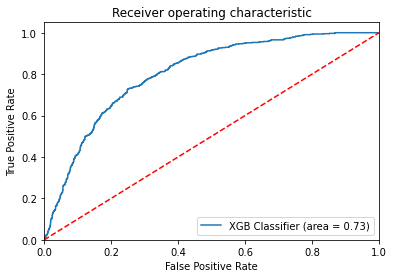

In [184]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGB Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [185]:
#Here in Logistic Regression ROC score: 0.73

#### RANDOM FOREST

In [186]:
#Random Forest--Attempt 1-- 0.57

from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.metrics import roc_auc_score,accuracy_score
rf_model = rf(ccp_alpha=0, criterion='entropy', max_depth=60,
                       max_leaf_nodes=10, random_state=10,class_weight='balanced')

# fitting the model
rf_model.fit(x_train,y_train)

# make training prediction
train_yhat = rf_model.predict(x_train)
train_score = accuracy_score(y_train, train_yhat)

# make test prediction
test_yhat = rf_model.predict(x_test)
test_score = accuracy_score(y_test, test_yhat)


print(roc_auc_score(y_test,test_yhat))
train_score, test_score



0.7260413308580767


(0.7275948038315182, 0.7193074501573977)

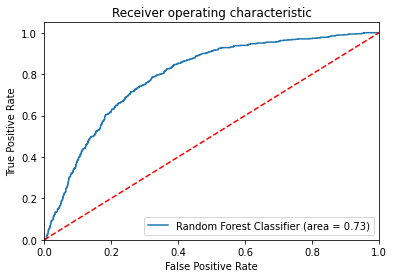

In [187]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
logit_roc_auc = roc_auc_score(y_test, rf_model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [188]:
#Here in Random forest Classifier ROC score: 0.73

#### XGBOOST

In [189]:
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

from sklearn import metrics

from sklearn.model_selection import GridSearchCV

In [190]:
#Simple - XGBOOST
import xgboost as xgb


xg_model = xgb.XGBClassifier(max_depth=17, n_estimators= 500,min_sample_split = 5, reg_alpha= 10)

xg_model.fit(x_train,y_train)
# make training prediction
xg_train_yhat = xg_model.predict(x_train)
xg_train_score = accuracy_score(y_train, xg_train_yhat)

# make test prediction
xg_test_yhat = xg_model.predict(x_test)
xg_test_score = accuracy_score(y_test, xg_test_yhat)

xg_train_score, xg_test_score


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:45:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_sample_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:45:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(0.809998687836242, 0.7465897166841553)

In [191]:
print(roc_auc_score(y_train,xg_train_yhat))

0.7822713214024749


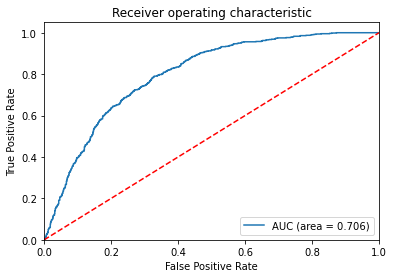

In [192]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
logit_roc_auc = roc_auc_score(y_test, xg_model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, xg_model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
plt.show()

In [193]:
print(roc_auc_score(y_test,xg_test_yhat))

0.7058390860818688


In [194]:

param_test1 = {
 'max_depth':[9,12,15],
 'n_estimators':[100,120],
 'reg_alpha':[10,13,11],
}
xgb1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=12,
 gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=-1, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=-1, cv=5)
xgb1.fit(x_train,y_train)

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:46:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=12, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_me

In [195]:
xgb1.best_params_

{'max_depth': 12, 'n_estimators': 100, 'reg_alpha': 10}

In [196]:
roc_auc_score(y_train,xgb1.best_estimator_.predict(x_train))

0.7601209806362088

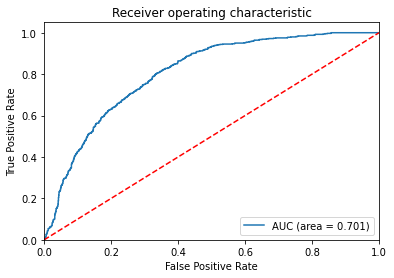

In [197]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
logit_roc_auc = roc_auc_score(y_test, xgb1.best_estimator_.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, xgb1.best_estimator_.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [198]:
#Here in XGBOost Classifier ROC score: 0.70

#### TEST DATA

In [199]:
test_df = pd.read_csv("C:/Users/ayush.chaturvedi/Downloads/test_ZkjAHF8_2shxaJa_vZtSmPc.csv")

In [200]:
test_df.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2
0,FIN1009528,284001,7/2/2008,284001.0,M,8/5/1982,S,Salaried,Graduate,5/26/2008,...,2.0,Probation,F,10/14/1978,1.0,0.0,0.0,0.0,0.0,0.0
1,FIN1009529,800001,7/2/2008,800026.0,M,3/11/1968,M,Salaried,Graduate,6/24/2008,...,2.0,Probation,M,3/3/1971,2.0,0.0,0.0,0.0,0.0,0.0
2,FIN1009530,800001,7/2/2008,NaN,M,12/16/1984,S,NaN,Graduate,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FIN1009531,800001,7/2/2008,844112.0,M,6/7/1971,S,Salaried,Graduate,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FIN1009532,533101,7/2/2008,533102.0,M,7/22/1978,S,NaN,Masters of Business Administration,12/4/2007,...,3.0,Confirmation,M,6/23/1977,4.0,1.0,97352.0,3.0,97352.0,3.0


In [201]:
#Columns of df
test_df.columns

Index(['ID', 'Office_PIN', 'Application_Receipt_Date', 'Applicant_City_PIN',
       'Applicant_Gender', 'Applicant_BirthDate', 'Applicant_Marital_Status',
       'Applicant_Occupation', 'Applicant_Qualification', 'Manager_DOJ',
       'Manager_Joining_Designation', 'Manager_Current_Designation',
       'Manager_Grade', 'Manager_Status', 'Manager_Gender', 'Manager_DoB',
       'Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business',
       'Manager_Num_Products', 'Manager_Business2', 'Manager_Num_Products2'],
      dtype='object')

In [202]:
#Shape of object
test_df.shape

(5045, 22)

In [203]:
#missing value percentage
test_df.isnull().sum()/len(test_df)*100

ID                              0.000000
Office_PIN                      0.000000
Application_Receipt_Date        0.000000
Applicant_City_PIN              0.673935
Applicant_Gender                0.436075
Applicant_BirthDate             0.455897
Applicant_Marital_Status        0.594648
Applicant_Occupation           19.900892
Applicant_Qualification         0.872151
Manager_DOJ                    16.333003
Manager_Joining_Designation    16.333003
Manager_Current_Designation    16.333003
Manager_Grade                  16.333003
Manager_Status                 16.333003
Manager_Gender                 16.333003
Manager_DoB                    16.333003
Manager_Num_Application        16.333003
Manager_Num_Coded              16.333003
Manager_Business               16.333003
Manager_Num_Products           16.333003
Manager_Business2              16.333003
Manager_Num_Products2          16.333003
dtype: float64

In [204]:
#Info of df()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5045 entries, 0 to 5044
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           5045 non-null   object 
 1   Office_PIN                   5045 non-null   int64  
 2   Application_Receipt_Date     5045 non-null   object 
 3   Applicant_City_PIN           5011 non-null   float64
 4   Applicant_Gender             5023 non-null   object 
 5   Applicant_BirthDate          5022 non-null   object 
 6   Applicant_Marital_Status     5015 non-null   object 
 7   Applicant_Occupation         4041 non-null   object 
 8   Applicant_Qualification      5001 non-null   object 
 9   Manager_DOJ                  4221 non-null   object 
 10  Manager_Joining_Designation  4221 non-null   object 
 11  Manager_Current_Designation  4221 non-null   object 
 12  Manager_Grade                4221 non-null   float64
 13  Manager_Status    

In [205]:
# # If applicant City pin is missing thn we are putting applicants office pin.
# test_df.loc[df['Applicant_City_PIN'].isnull(),'Applicant_City_PIN'] = test_df.loc[df['Applicant_City_PIN'].isnull(),'Office_PIN']



In [206]:
test_df['Application_Receipt_Date'] = pd.to_datetime(test_df['Application_Receipt_Date'])
test_df['Applicant_BirthDate'] = pd.to_datetime(test_df['Applicant_BirthDate'])
test_df['Manager_DoB'] = pd.to_datetime(test_df['Manager_DoB'])
test_df['Manager_DOJ'] = pd.to_datetime(test_df['Manager_DOJ'])

In [207]:
test_df['Applicant_Gender']=test_df['Applicant_Gender'].fillna(test_df['Applicant_Gender'].mode()[0])

In [208]:
test_df['Applicant_Marital_Status']=test_df['Applicant_Marital_Status'].fillna(test_df['Applicant_Marital_Status'].mode()[0])

In [209]:

test_df['Applicant_Occupation']=test_df['Applicant_Occupation'].fillna('Not Present')

In [210]:
test_df['Applicant_Qualification'].replace('Masters of Business Administration','Other',inplace = True)
test_df['Applicant_Qualification'].replace('Associate/Fellow of Institute of Company Secretories of India','Other',inplace = True)
test_df['Applicant_Qualification'].replace('Associate / Fellow of Institute of Chartered Accountans of India','Other',inplace = True)
test_df['Applicant_Qualification'].replace('Associate/Fellow of Insurance Institute of India','Other',inplace = True)
test_df['Applicant_Qualification'].replace('Associate/Fellow of Acturial Society of India','Other',inplace = True)
test_df['Applicant_Qualification'].replace('Certified Associateship of Indian Institute of Bankers','Other',inplace = True)
test_df['Applicant_Qualification'].replace('Professional Qualification in Marketing','Other',inplace = True)
test_df['Manager_Joining_Designation'].replace(['Level 4','Level 5','Level 6','Level 7'],'Other', inplace=True)
test_df['Manager_Current_Designation'].replace(['Level 4','Level 5'],'Other', inplace=True)
test_df['Manager_Grade'].replace(['5','6','7','8','9','10'],'Other', inplace=True)

In [211]:
test_df['Manager_Joining_Designation']=test_df['Manager_Joining_Designation'].fillna('Level 0')

In [212]:
test_df['Manager_Current_Designation']=test_df['Manager_Current_Designation'].fillna('Level 0')

In [213]:
test_df['Manager_Grade']=test_df['Manager_Grade'].fillna(-1)

In [214]:
test_df['Manager_Status']=test_df['Manager_Status'].fillna('missing')

In [215]:
test_df['Manager_Gender']=test_df['Manager_Gender'].fillna(test_df['Manager_Gender'].mode()[0])

In [216]:
test_df['Manager_Current_Designation'] = test_df['Manager_Current_Designation'].apply(lambda x: 0 if x=='Other' else -1 if x=='Level 0' else int(x.split(' ')[-1]))


test_df['Manager_Joining_Designation'] = test_df['Manager_Joining_Designation'].apply(lambda x: 0 if x=='Other' else -1 if x=='Level 0' else int(x.split(' ')[-1]))


In [217]:
# test_df['Manager_Current_Designation'].value_counts()
test_df['Manager_Joining_Designation'] = test_df['Manager_Joining_Designation'].astype(int)
test_df['Manager_Current_Designation'] = test_df['Manager_Current_Designation'].astype(int)

In [218]:
test_df['Is_Promotion'] = (test_df['Manager_Current_Designation'] - test_df['Manager_Joining_Designation']).apply(lambda x : 'promoted' if x>0 else 'demoted' if x<0 else 'same' )
test_df.loc[test_df['Manager_Current_Designation'] =='Level 0','Is_Promotion'] = 'Not Present'

In [219]:
test_df['Is_Promotion'] = (test_df['Manager_Current_Designation'] - test_df['Manager_Joining_Designation']).apply(lambda x : 'promoted' if x>0 else 'demoted' if x<0 else 'same' )

# df['Is_Promotion'] = (df['Manager_Current_Designation'] - df['Manager_Joining_Designation']).apply(lambda x : 'promoted' if x>0 else 'demoted' if x<0 else 'same' )
test_df.loc[df['Manager_Current_Designation'] ==-1,'Is_Promotion'] = 'Not Present'


In [220]:
test_df['Manager_Num_Application']=test_df['Manager_Num_Application'].fillna(0)

In [221]:
test_df['Manager_Num_Coded']=test_df['Manager_Num_Coded'].fillna(0)

In [222]:
test_df['Manager_Num_Products']=test_df['Manager_Num_Products'].fillna(0)

test_df['Manager_Num_Products2']=test_df['Manager_Num_Products2'].fillna(0)

In [223]:
date_today=pd.to_datetime(datetime.today().strftime('%Y-%m-%d'))
test_df['Age_Applicant'] = (date_today - test_df['Applicant_BirthDate']).astype('<m8[Y]')
test_df['Age_Manager'] = (date_today - test_df['Manager_DoB']).astype('<m8[Y]')

In [224]:

test_df['Manager_Experience'] = (date_today - test_df['Manager_DOJ']).astype('<m8[Y]')

In [225]:
test_df['Age_Applicant'] = pd.cut(test_df['Age_Applicant'],[10,30,50,70,90,100],
       labels=['less than 30','30-50','50-70','70-90','greater than 90'])


test_df['Age_Manager'] = pd.cut(test_df['Age_Manager'],[10,30,50,70,90,100],
       labels=['less than 30','30-50','50-70','70-90','greater than 90'])



In [226]:
ApplicationGroupBy =  test_df.groupby('Application_Receipt_Date')
test_df['Per Day Application'] = (ApplicationGroupBy['ID'].cumcount()+1)

In [227]:




test_df['Manager_Num_Products']=test_df['Manager_Num_Products']+test_df['Manager_Num_Products2']

test_df.drop('Manager_Num_Products2',axis=1,inplace=True)

In [228]:
test_df['Age_Applicant'].fillna(test_df['Age_Applicant'].mode()[0], inplace =True)
test_df['Age_Manager'].fillna(test_df['Age_Manager'].mode()[0], inplace =True)

In [229]:

test_df['Manager_Business']=test_df['Manager_Business'].fillna(0)

test_df['Manager_Business2']=test_df['Manager_Business2'].fillna(0)

In [230]:
test_df['Manager_Business']=test_df['Manager_Business']+test_df['Manager_Business2']
test_df.drop('Manager_Business2',axis=1,inplace=True)


In [231]:
test_df['Manager_Experience']=test_df['Manager_Experience'].fillna(test_df['Manager_Experience'].mode()[0])

In [232]:
test_df.drop(['Applicant_City_PIN','Office_PIN'],axis=1,inplace=True)

In [233]:
test_df.Applicant_Qualification.fillna(test_df.Applicant_Qualification.mode()[0],inplace=True)

In [234]:
test_df.Manager_Grade = test_df.Manager_Grade.astype('object')
test_df.Manager_Num_Coded = test_df.Manager_Num_Coded.astype('object')

In [235]:
ids = test_df['ID']
test_df.drop('ID',inplace=True,axis=1)


In [236]:
cat_cols =test_df.columns[(test_df.dtypes =='object') | (test_df.dtypes=='category')]
dummies = pd.get_dummies(test_df[cat_cols],drop_first=True)

In [237]:
dummies

,Applicant_Gender_M,Applicant_Marital_Status_M,Applicant_Marital_Status_S,Applicant_Marital_Status_W,Applicant_Occupation_Not Present,Applicant_Occupation_Others,Applicant_Occupation_Salaried,Applicant_Occupation_Self Employed,Applicant_Occupation_Student,Applicant_Qualification_Class X,...,Is_Promotion_promoted,Is_Promotion_same,Age_Applicant_30-50,Age_Applicant_50-70,Age_Applicant_70-90,Age_Applicant_greater than 90,Age_Manager_30-50,Age_Manager_50-70,Age_Manager_70-90,Age_Manager_greater than 90
0,1,0,1,0,0,0,1,0,0,0,...,0,1,1,0,0,0,1,0,0,0
1,1,1,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2,1,0,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
3,1,0,1,0,0,0,1,0,0,0,...,0,1,1,0,0,0,1,0,0,0
4,1,0,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
5041,1,1,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
5042,1,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
5043,1,1,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0


In [238]:
cat_cols

Index(['Applicant_Gender', 'Applicant_Marital_Status', 'Applicant_Occupation',
       'Applicant_Qualification', 'Manager_Grade', 'Manager_Status',
       'Manager_Gender', 'Manager_Num_Coded', 'Is_Promotion', 'Age_Applicant',
       'Age_Manager'],
      dtype='object')

In [239]:
test_df = pd.concat([test_df,dummies],axis=1)
test_df = test_df.drop(cat_cols,axis=1)
test_df.head()

,Application_Receipt_Date,Applicant_BirthDate,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_DoB,Manager_Num_Application,Manager_Business,Manager_Num_Products,Manager_Experience,...,Is_Promotion_promoted,Is_Promotion_same,Age_Applicant_30-50,Age_Applicant_50-70,Age_Applicant_70-90,Age_Applicant_greater than 90,Age_Manager_30-50,Age_Manager_50-70,Age_Manager_70-90,Age_Manager_greater than 90
0,2008-07-02,1982-08-05,2008-05-26,1,1,1978-10-14,1.0,0.0,0.0,13.0,...,0,1,1,0,0,0,1,0,0,0
1,2008-07-02,1968-03-11,2008-06-24,1,1,1971-03-03,2.0,0.0,0.0,13.0,...,0,1,0,1,0,0,1,0,0,0
2,2008-07-02,1984-12-16,NaT,-1,-1,NaT,0.0,0.0,0.0,13.0,...,0,1,1,0,0,0,1,0,0,0
3,2008-07-02,1971-06-07,NaT,-1,-1,NaT,0.0,0.0,0.0,13.0,...,0,1,1,0,0,0,1,0,0,0
4,2008-07-02,1978-07-22,2007-12-04,2,2,1977-06-23,4.0,194704.0,6.0,13.0,...,0,1,1,0,0,0,1,0,0,0


In [240]:
test_df.drop(['Application_Receipt_Date','Applicant_BirthDate', 'Manager_DOJ', 'Manager_DoB'],axis=1,inplace=True)

In [241]:
( set(x_train.columns) - set(test_df.columns))

{'Age_Applicant_less than 30',
 'Age_Manager_less than 30',
 'Applicant_Gender_F',
 'Applicant_Marital_Status_D',
 'Applicant_Occupation_Business',
 'Is_Promotion_Not Present',
 'Manager_Gender_F',
 'Manager_Grade_0',
 'Manager_Grade_1.0',
 'Manager_Grade_10.0',
 'Manager_Grade_9.0',
 'Manager_Num_Coded_0.0',
 'Manager_Status_Confirmation'}

In [242]:
for i in list( set(x_train.columns) - set(test_df.columns)):
  test_df[i] = 0
test_df = test_df[x_train.columns]

In [248]:
xgb1.predict_proba(test_df)[:,1]

array([0.68573356, 0.65663284, 0.6285954 , ..., 0.02747592, 0.02038538,
       0.0211085 ], dtype=float32)

In [244]:
ids

0       FIN1009528
1       FIN1009529
2       FIN1009530
3       FIN1009531
4       FIN1009532
           ...    
5040    FIN1014568
5041    FIN1014569
5042    FIN1014570
5043    FIN1014571
5044    FIN1014572
Name: ID, Length: 5045, dtype: object

In [251]:
# final_data=pd.DataFrame()
# #test1 = testdata

# final_data['ID']=ids
# final_data['Business_Sourced']=xgb1.predict_proba(test_df)[:,1]
# final_data
result = pd.DataFrame({'ID':ids,'Business_Sourced':xgb1.predict_proba(test_df)[:,1]})
result.to_csv('result2.csv', index=False)
result.head()

,ID,Business_Sourced
0,FIN1009528,0.685734
1,FIN1009529,0.656633
2,FIN1009530,0.628595
3,FIN1009531,0.640210
4,FIN1009532,0.614121
